In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_Data_Sampled.csv')

In [ ]:
## Check dimensions
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.info() # Shows data types
df.describe().T # .T transposes the table for easier reading

df.describe(include='all').T

Dataset has 15000 rows and 13 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
mem

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,15000.0,NaN,NaN,NaN,7500.5,4330.271354,1.0,3750.75,7500.5,11250.25,15000.0
Gender,15000,2,Female,8569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,15000.0,NaN,NaN,NaN,44.130667,6.840091,27.0,40.0,44.0,48.0,59.0
Occupation,15000,11,Nurse,4316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,15000.0,NaN,NaN,NaN,6.997327,0.615187,5.8,6.5,7.0,7.45,8.5
Quality of Sleep,15000.0,NaN,NaN,NaN,7.131267,1.053111,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,15000.0,NaN,NaN,NaN,59.925,16.814374,30.0,45.0,60.0,75.0,90.0
Stress Level,15000.0,NaN,NaN,NaN,5.6548,1.393568,3.0,4.0,6.0,6.0,8.0
BMI Category,15000,4,Overweight,8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,15000,25,130/85,4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


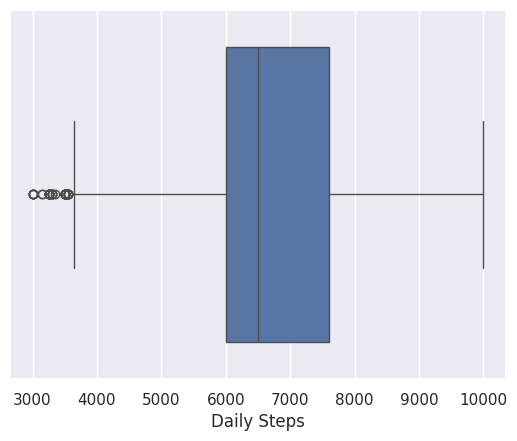

In [ ]:
sns.boxplot(x=df['Daily Steps'])
plt.show()

To cisually confirm these outliers, first createsa boxplot.

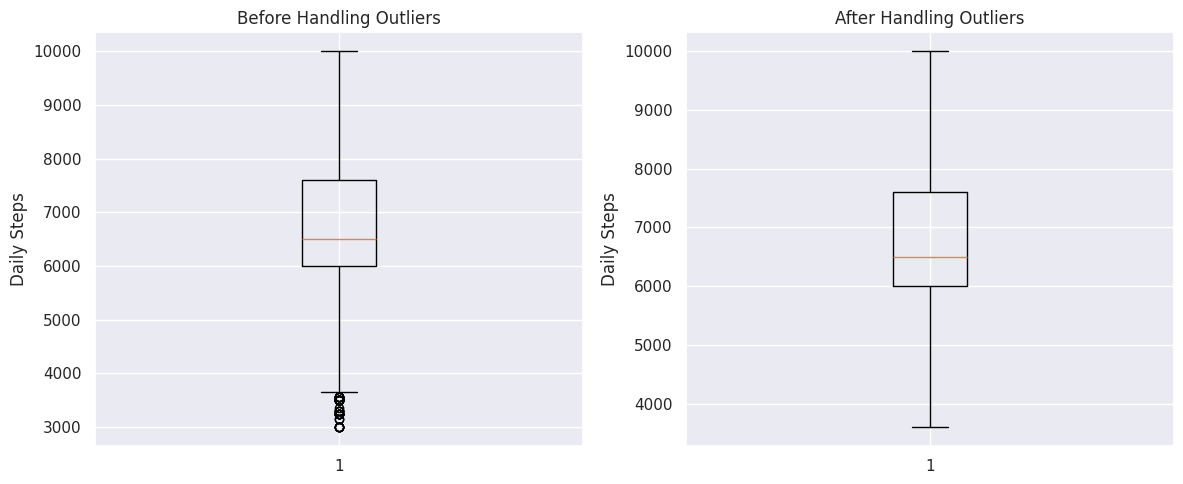

Lower bound: 3600.00
Upper bound: 10000.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots to compare before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before handling outliers
ax1.boxplot(df['Daily Steps'].dropna())
ax1.set_title('Before Handling Outliers')
ax1.set_ylabel('Daily Steps')

# Calculate IQR and bounds
Q1 = df['Daily Steps'].quantile(0.25)
Q3 = df['Daily Steps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the values
df['Daily Steps'] = np.clip(df['Daily Steps'], lower_bound, upper_bound)

# After handling outliers
ax2.boxplot(df['Daily Steps'].dropna())
ax2.set_title('After Handling Outliers')
ax2.set_ylabel('Daily Steps')

plt.tight_layout()
plt.show()

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

This method doesn't remove the data points entirely. Instead, it brings any extreme values that fall below the lower bound up to the lower bound, and any values that exceed the upper bound down to the upper bound. This effectively limits the influence of the outliers without deleting them.

choose the capping method because, for a feature like 'Daily Steps', outliers are not necessarily errors but often represent real-world behavioral extremes

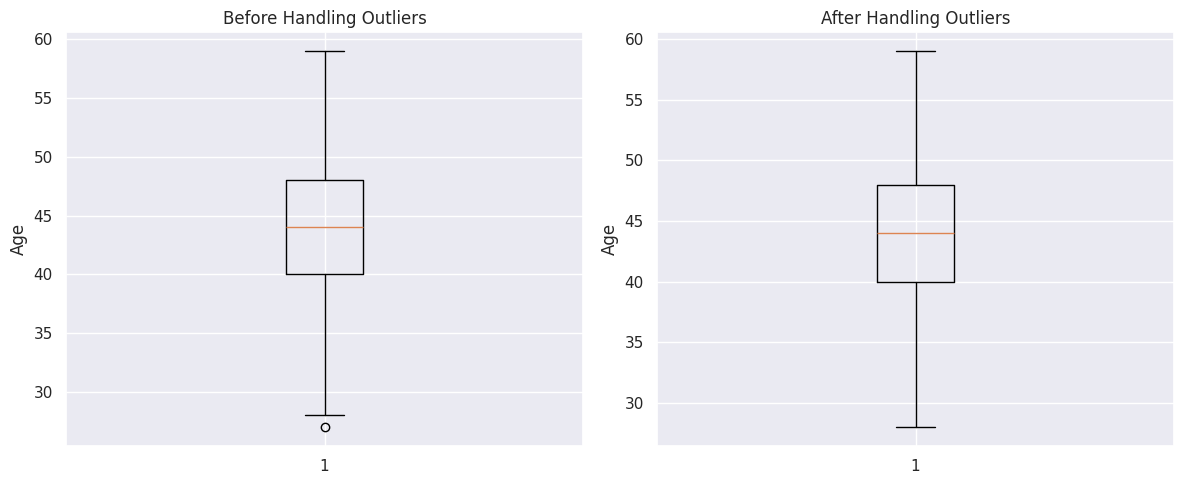

Lower bound: 28.00
Upper bound: 60.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots to compare before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before handling outliers
ax1.boxplot(df['Age'].dropna())
ax1.set_title('Before Handling Outliers')
ax1.set_ylabel('Age')

# Calculate IQR and bounds
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the values
df['Age'] = np.clip(df['Age'], lower_bound, upper_bound)

# After handling outliers
ax2.boxplot(df['Age'].dropna())
ax2.set_title('After Handling Outliers')
ax2.set_ylabel('Age')

plt.tight_layout()
plt.show()

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

chose the capping method because, ouliers are in practical range

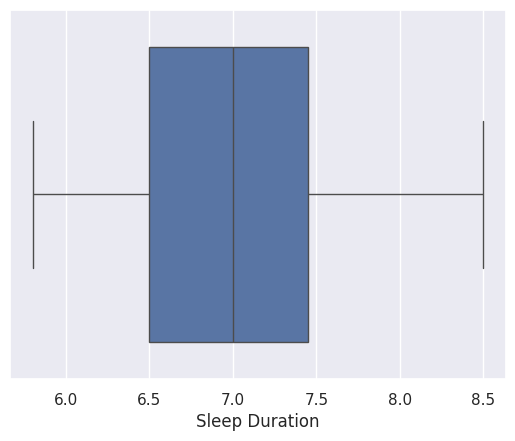

In [ ]:
sns.boxplot(x=df['Sleep Duration'])
plt.show()

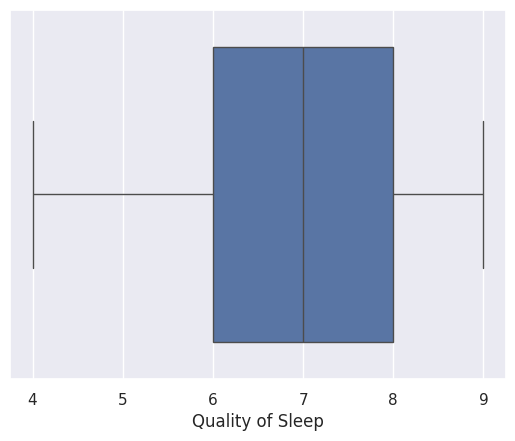

In [ ]:
sns.boxplot(x=df['Quality of Sleep'])
plt.show()

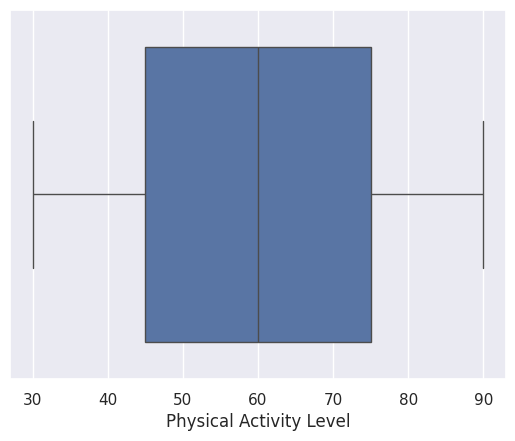

In [ ]:
sns.boxplot(x=df['Physical Activity Level'])
plt.show()

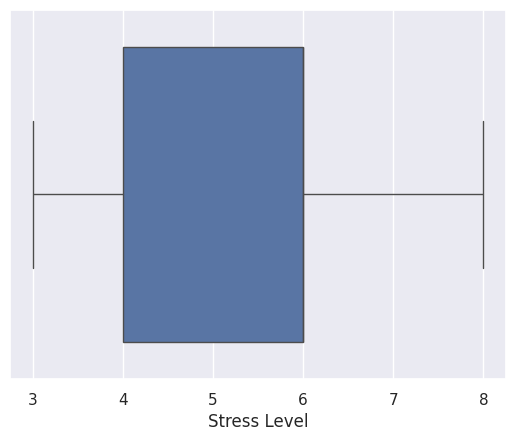

In [ ]:
sns.boxplot(x=df['Stress Level'])
plt.show()

Before removal:
Dataset shape: (15000, 13)
Lower bound: 62.00
Upper bound: 78.00
Number of outliers in Heart Rate: 479

After removal:
Dataset shape: (14521, 13)
Number of rows removed: 479


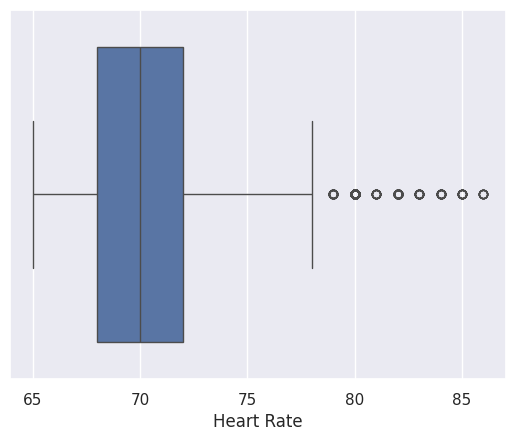

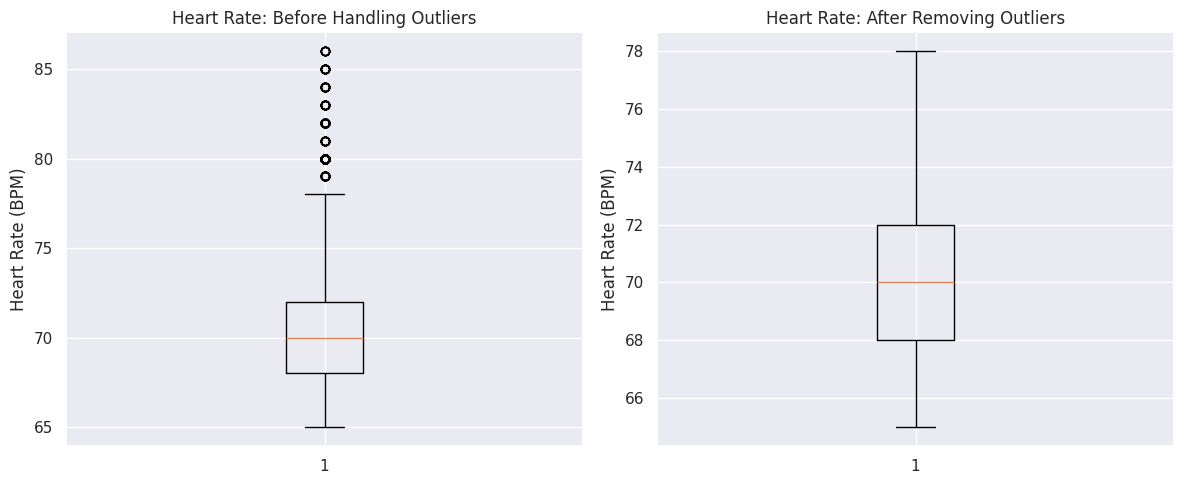


Sample of removed outlier rows:
      Heart Rate
4842          80
4873          86
4890          80
4905          80
4924          80


In [ ]:
sns.boxplot(x=df['Heart Rate'])# Create a copy of the original dataframe for comparison
df_original = df.copy()

# Create subplots to compare before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before handling outliers - Heart Rate
ax1.boxplot(df['Heart Rate'].dropna())
ax1.set_title('Heart Rate: Before Handling Outliers')
ax1.set_ylabel('Heart Rate (BPM)')

# Calculate IQR and bounds for Heart Rate
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Before removal:")
print(f"Dataset shape: {df.shape}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify outliers in Heart Rate
outlier_mask = (df['Heart Rate'] < lower_bound) | (df['Heart Rate'] > upper_bound)
num_outliers = outlier_mask.sum()
print(f"Number of outliers in Heart Rate: {num_outliers}")

# Remove rows with outliers in Heart Rate
df_clean = df[~outlier_mask]  # Keep rows that are NOT outliers

print("\nAfter removal:")
print(f"Dataset shape: {df_clean.shape}")
print(f"Number of rows removed: {len(df) - len(df_clean)}")

# After handling outliers - Heart Rate
ax2.boxplot(df_clean['Heart Rate'].dropna())
ax2.set_title('Heart Rate: After Removing Outliers')
ax2.set_ylabel('Heart Rate (BPM)')

plt.tight_layout()
plt.show()

# Show some of the removed outliers
if num_outliers > 0:
    print("\nSample of removed outlier rows:")
    print(df[outlier_mask][['Heart Rate']].head())
else:
    print("\nNo outliers found in Heart Rate feature.")
plt.show()

Extreme heart rate values could be due to sensor malfunctions or data recording errors, making them unreliable for our analysis.
